# 稀疏特征矩阵上的降维

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

In [13]:
import cv2

In [5]:
# 标准化
x = StandardScaler().fit_transform(digits.data)
x.shape

(1797, 64)

In [7]:
x[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [6]:
csr_matrix?

Init signature: csr_matrix(arg1, shape=None, dtype=None, copy=False)
Docstring:     
Compressed Sparse Row matrix

This can be instantiated in several ways:
    csr_matrix(D)
        with a dense matrix or rank-2 ndarray D

    csr_matrix(S)
        with another sparse matrix S (equivalent to S.tocsr())

    csr_matrix((M, N), [dtype])
        to construct an empty matrix with shape (M, N)
        dtype is optional, defaulting to dtype='d'.

    csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
        where ``data``, ``row_ind`` and ``col_ind`` satisfy the
        relationship ``a[row_ind[k], col_ind[k]] = data[k]``.

    csr_matrix((data, indices, indptr), [shape=(M, N)])
        is the standard CSR representation where the column indices for
        row i are stored in ``indices[indptr[i]:indptr[i+1]]`` and their
        corresponding values are stored in ``data[indptr[i]:indptr[i+1]]``.
        If the shape parameter is not supplied, the matrix dimensions
        are inferred 

In [8]:
# 生成系数矩阵
x_sparse = csr_matrix(x)
x_sparse

<1797x64 sparse matrix of type '<class 'numpy.float64'>'
	with 109617 stored elements in Compressed Sparse Row format>

In [9]:
# 截断奇异值分解
tsvd = TruncatedSVD(n_components=10)
x_sparse_tsvd = tsvd.fit_transform(x_sparse)

In [10]:
# 展示结果
print('Original number of features:', x_sparse.shape[1])
print('Reduced number of features:', x_sparse_tsvd.shape[1])

Original number of features: 64
Reduced number of features: 10


In [12]:
# 前10个主成分的解释方差比之和
tsvd.explained_variance_ratio_[:10].sum()

0.588734444335782

# 核 PCA 降维

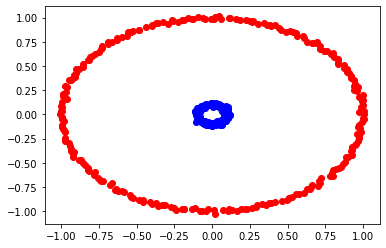

In [22]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

# 创建线性不可分的数据
X, y = make_circles(n_samples=500, random_state=1, noise=.01, factor=0.1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', label='y=1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', label='y=0')

In [41]:
KernelPCA?

Init signature:
KernelPCA(
    n_components=None,
    *,
    kernel='linear',
    gamma=None,
    degree=3,
    coef0=1,
    kernel_params=None,
    alpha=1.0,
    fit_inverse_transform=False,
    eigen_solver='auto',
    tol=0,
    max_iter=None,
    remove_zero_eig=False,
    random_state=None,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Kernel Principal component analysis (KPCA)

Non-linear dimensionality reduction through the use of kernels (see
:ref:`metrics`).

Read more in the :ref:`User Guide <kernel_PCA>`.

Parameters
----------
n_components : int, default=None
    Number of components. If None, all non-zero components are kept.

kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
    Kernel. Default="linear".

gamma : float, default=1/n_features
    Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other
    kernels.

degree : int, default=3
    Degree for poly kernels. Ignored by other kernels.

coef0 : float, default=1
    Indepe

In [35]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

In [31]:
sum(y==1)

250

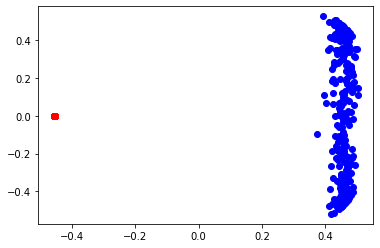

In [36]:
plt.scatter(X_kpca[y==1, 0],X_kpca[y==1, 1], c='b', label='y=1')
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], c='r', label='y=0')

# 使用 PCA 的降维

In [40]:
PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float, None or str
    Number of components to keep.
    if n_components is not 

In [43]:
# 加载库
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# 加载数据
digits = datasets.load_digits()

# 标准化特征矩阵
X = StandardScaler().fit_transform(digits.data)

# 创建保留 99% 方差的 PCA
pca = PCA(n_components=0.99, whiten=True)

# 使用 PCA
X_pca = pca.fit_transform(X)

# 展示结果
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])
print("方差贡献率", pca.explained_variance_ratio_[:X_pca.shape[1]].sum())

Original number of features: 64
Reduced number of features: 54
方差贡献率 0.9907660487766969


# 为 LDA(LinearDiscriminantAnalysis)选择最佳数量的成分

In [57]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 加载鸢尾花数据集
X, y = datasets.make_classification(
    n_samples=10000, n_features=20, n_informative=10, n_redundant=2, n_classes=5)

lda = LinearDiscriminantAnalysis(n_components=4)  # 最多M-1
X_lda = lda.fit(X, y)
# 方差贡献率
lda_var_ratios = lda.explained_variance_ratio_

In [53]:
LinearDiscriminantAnalysis?

Init signature:
LinearDiscriminantAnalysis(
    *,
    solver='svd',
    shrinkage=None,
    priors=None,
    n_components=None,
    store_covariance=False,
    tol=0.0001,
)
Docstring:     
Linear Discriminant Analysis

A classifier with a linear decision boundary, generated by fitting class
conditional densities to the data and using Bayes' rule.

The model fits a Gaussian density to each class, assuming that all classes
share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input
by projecting it to the most discriminative directions, using the
`transform` method.

.. versionadded:: 0.17
   *LinearDiscriminantAnalysis*.

Read more in the :ref:`User Guide <lda_qda>`.

Parameters
----------
solver : {'svd', 'lsqr', 'eigen'}, default='svd'
    Solver to use, possible values:
      - 'svd': Singular value decomposition (default).
        Does not compute the covariance matrix, therefore this solver is
        recommended for data with a 

In [55]:
def select_n_compoents(var_ratio, goal_var:float) -> int:
    total_variance = 0.
    n_compoents = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_compoents += 1
        if total_variance > goal_var:
            break
    return n_compoents

In [59]:
select_n_compoents(lda_var_ratios, 0.95)

4